In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BlackFriday.csv')

del df['Product_Category_2']
del df['Product_Category_3']

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
for i in df.columns:
    print(df[i].nunique() ,"\t: ",i)

5891 	:  User_ID
3623 	:  Product_ID
2 	:  Gender
7 	:  Age
21 	:  Occupation
3 	:  City_Category
5 	:  Stay_In_Current_City_Years
2 	:  Marital_Status
18 	:  Product_Category_1
17959 	:  Purchase


In [5]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

In [6]:
df['Gender'] == 'M'

0         False
1         False
2         False
3         False
4          True
          ...  
537572     True
537573     True
537574     True
537575     True
537576     True
Name: Gender, Length: 537577, dtype: bool

In [7]:
df[df['Gender'] == 'M']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [8]:
data = pd.DataFrame(
    {'Ratio': [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]},
    index=['Male', 'Female']
)

In [9]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

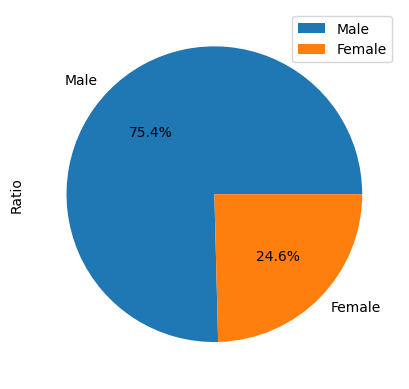

In [10]:
data.plot(kind = 'pie' , y = 'Ratio' , autopct = "%.1f%%")

## 2nd approach

In [11]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

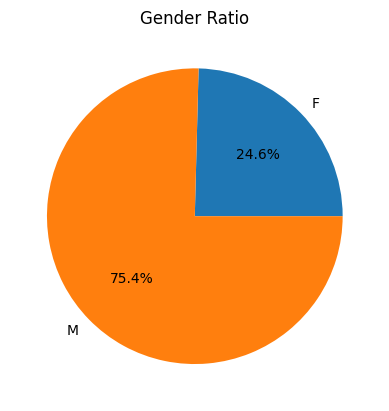

In [12]:
df.groupby('Gender').size().plot(kind = 'pie' ,  autopct = "%.1f%%" 
                                  , title = 'Gender Ratio')

<Axes: xlabel='Gender'>

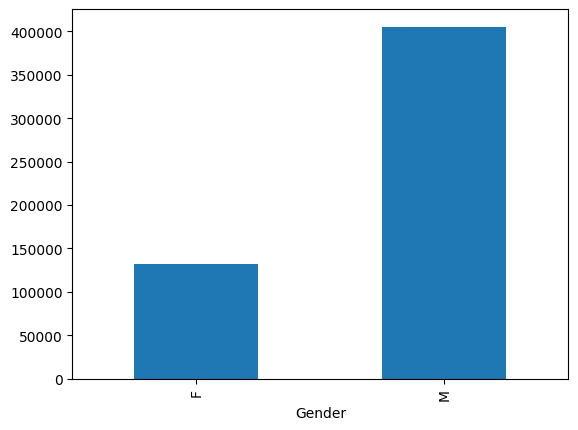

In [13]:
df.groupby('Gender').size().plot(kind = 'bar')

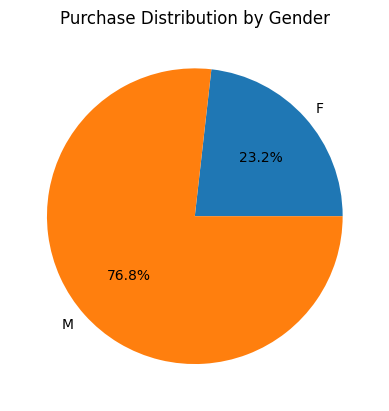

In [14]:
gender_purchase = df.groupby('Gender')['Purchase'].sum()

# Plotting as a pie chart
gender_purchase.plot(
    kind='pie',
    autopct="%0.1f%%",  # Display percentages with one decimal place
    labels=gender_purchase.index,  # Gender categories as labels
    legend=False,  # No legend needed
    title="Purchase Distribution by Gender"  # Optional: Add a title
)

plt.ylabel('')  # Remove the default y-axis label
plt.show()

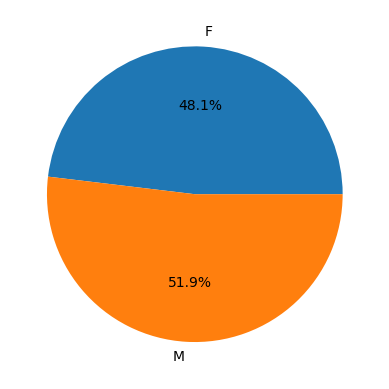

In [17]:
gender_purchase = df.groupby('Gender')['Purchase'].mean()

# Plotting as a pie chart
gender_purchase.plot(
    kind='pie',
    autopct="%0.1f%%",  # Display percentages with one decimal place
    labels=gender_purchase.index,  # Gender categories as labels
    legend=False,  # No legend needed
)

plt.ylabel('')  # Remove the default y-axis label
plt.show()